# **Loading tools and dataset**

In [1]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

from ast import literal_eval

import numpy as np

2024-06-15 08:26:34.793572: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-15 08:26:39.420793: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-15 08:26:43.097012: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
arxiv_data=pd.read_csv('arxiv_data_210930-054931.csv')

In [3]:
arxiv_data.head()

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...


# **Data Cleaning and Preprocessing**

In [4]:
arxiv_data.shape

(56181, 3)

In [5]:
arxiv_data.isnull().sum()

terms        0
titles       0
abstracts    0
dtype: int64

In [6]:
arxiv_data

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...
...,...,...,...
56176,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...
56177,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...
56178,['cs.LG'],Deep Reinforcement Learning with Double Q-lear...,The popular Q-learning algorithm is known to o...
56179,"['stat.ML', 'cs.LG', 'math.OC']",Generalized Low Rank Models,Principal components analysis (PCA) is a well-...


# **Data Cleaning and Preprocessing**

In [7]:
arxiv_data.shape

(56181, 3)

In [8]:
arxiv_data.isnull().sum()

terms        0
titles       0
abstracts    0
dtype: int64

In [9]:
arxiv_data.duplicated().sum()

15054

In [10]:
arxiv_data['terms']

0                                          ['cs.LG']
1                                 ['cs.LG', 'cs.AI']
2                      ['cs.LG', 'cs.CR', 'stat.ML']
3                                 ['cs.LG', 'cs.CR']
4                                          ['cs.LG']
                            ...                     
56176                             ['cs.CV', 'cs.IR']
56177    ['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']
56178                                      ['cs.LG']
56179                ['stat.ML', 'cs.LG', 'math.OC']
56180                  ['cs.LG', 'cs.AI', 'stat.ML']
Name: terms, Length: 56181, dtype: object

In [11]:
# getting unique labels
labels_column = arxiv_data['terms'].apply(literal_eval)
labels = labels_column.explode().unique()
print("labels :",labels)
print("lenght :",len(labels))

labels : ['cs.LG' 'cs.AI' 'cs.CR' ... 'D.1.3; G.4; I.2.8; I.2.11; I.5.3; J.3'
 '68T07, 68T45, 68T10, 68T50, 68U35' 'I.2.0; G.3']
lenght : 1177


In [12]:
# remove duplicate entries based on the "titles" (terms) column
# This filters the DataFrame, keeping only the rows where the titles are not duplicated.
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")
# There are some terms with occurrence as low as 1.
print(sum(arxiv_data['terms'].value_counts()==1))
# how many unique terms
print(arxiv_data['terms'].nunique())

There are 41105 rows in the deduplicated dataset.
2503
3401


In [13]:
# Filtering the rare terms. (it keeps only those rows where the "terms" value occurs more than once in the original DataFrame.)
arxiv_data_filtered = arxiv_data.groupby('terms').filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(38602, 3)

In [14]:
# It evaluates the given string containing a Python literal or container display (e.g., a list or dictionary) and returns the corresponding Python object.
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms'].apply(lambda x: literal_eval(x))
arxiv_data_filtered['terms'].values[:3]

array([list(['cs.LG']), list(['cs.LG', 'cs.AI']),
       list(['cs.LG', 'cs.CR', 'stat.ML'])], dtype=object)

# **train and test split.**

In [15]:
test_split = 0.1

# Initial train and test split.
# The stratify parameter ensures that the splitting is done in a way that preserves the same distribution of labels (terms) in both the training and test sets.
train_df, test_df = train_test_split(arxiv_data_filtered,test_size=test_split,stratify=arxiv_data_filtered["terms"].values,)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 34741
Number of rows in validation set: 1930
Number of rows in test set: 1931


In [16]:
# creates a TensorFlow RaggedTensor (terms) from the values in the "terms" column of the train_df DataFrame. A RaggedTensor is a tensor with non-uniform shapes
terms = tf.ragged.constant(train_df['terms'].values)
# This line creates a StringLookup layer in TensorFlow. The purpose of this layer is to map strings to integer indices and vice versa. The output_mode="multi_hot" indicates that the layer will output a multi-hot encoded representation of the input strings.
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
# This step adapts the StringLookup layer to the unique values in the "terms" column, building the vocabulary.
lookup.adapt(terms)
# retrieve vocabulary
vocab = lookup.get_vocabulary()

print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'eess.IV', 'cs.RO', 'cs.CL', 'cs.NE', 'cs.GR', 'cs.CR', 'math.OC', 'eess.SP', 'cs.SI', 'cs.MM', 'cs.SY', 'cs.IR', 'eess.SY', 'cs.MA', 'cs.HC', 'math.IT', 'cs.IT', 'cs.DC', 'stat.AP', 'cs.CY', 'stat.ME', 'stat.TH', 'math.ST', 'eess.AS', 'cs.SD', 'cs.DS', 'q-bio.QM', 'q-bio.NC', 'stat.CO', 'cs.CG', 'cs.GT', 'cs.NI', 'math.NA', 'cs.SE', 'cs.NA', 'I.2.6', 'physics.chem-ph', 'cs.DB', 'physics.comp-ph', 'cond-mat.dis-nn', 'q-bio.BM', 'cs.PL', 'cs.LO', 'math.PR', '68T45', 'cs.AR', 'physics.data-an', 'quant-ph', 'I.2.10', 'cs.CE', 'cond-mat.stat-mech', 'q-fin.ST', 'math.DS', 'I.4.6', 'cs.CC', '68T05', 'physics.soc-ph', 'physics.ao-ph', 'physics.med-ph', 'cs.PF', 'cs.DM', 'econ.EM', 'I.4.8', 'q-bio.GN', 'astro-ph.IM', 'physics.flu-dyn', 'math.AT', 'hep-ex', 'I.4', '68U10', 'q-fin.TR', 'physics.geo-ph', 'cs.FL', 'I.5.4', 'I.2', 'cond-mat.mtrl-sci', 'I.4.9', '68T10', 'physics.optics', 'I.4; I.5', '68T07', 'q-fin.CP', 'math.AP', 'I.2.6; 

In [17]:
sample_label = train_df["terms"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['cs.LG', 'cs.CR', 'stat.ML']
Label-binarized representation: [[0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [18]:
#max_seqlen: Maximum sequence length. It indicates the maximum length allowed for sequences.
max_seqlen = 150
#batch_size: Batch size. It specifies the number of samples to use in each iteration.
batch_size = 128
#padding_token: A token used for padding sequences.
padding_token = "<pad>"
#auto = tf.data.AUTOTUNE: auto is assigned the value tf.data.AUTOTUNE,
auto = tf.data.AUTOTUNE

def make_dataset(dataframe, is_train=True):
    # creating sequences of labesls
    labels = tf.ragged.constant(dataframe["terms"].values)
    #This line uses the previously defined lookup layer to convert the ragged tensor of labels into a binarized representation. The resulting label_binarized is a NumPy array.
    label_binarized = lookup(labels).numpy()
    # creating sequences of text.
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["abstracts"].values, label_binarized))
    # shuffling data basis on condition
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [19]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [20]:
def invert_multi_hot(encoded_labels):
    hot_indeces=np.argwhere(encoded_labels==1.0)[...,0]
    return np.take(vocab,hot_indeces)

text_batch, label_batch = next(iter(train_dataset))
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Abstract: b'This paper introduces a state-of-the-art video representation and applies it\nto efficient action recognition and detection. We first propose to improve the\npopular dense trajectory features by explicit camera motion estimation. More\nspecifically, we extract feature point matches between frames using SURF\ndescriptors and dense optical flow. The matches are used to estimate a\nhomography with RANSAC. To improve the robustness of homography estimation, a\nhuman detector is employed to remove outlier matches from the human body as\nhuman motion is not constrained by the camera. Trajectories consistent with the\nhomography are considered as due to camera motion, and thus removed. We also\nuse the homography to cancel out camera motion from the optical flow. This\nresults in significant improvement on motion-based HOF and MBH descriptors. We\nfurther explore the recent Fisher vector as an alternative feature encoding\napproach to the standard bag-of-words histogram, and consi

In [21]:
# Creating vocabulary with uniques words
vocabulary = set()
train_df["abstracts"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

159050


# **Text Vectorization**

In [22]:
text_vectorizer = layers.TextVectorization(max_tokens=vocabulary_size,ngrams=2,output_mode="tf_idf")
# `TextVectorization` layer needs to be adapted as per the vocabulary from our training set.
text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

2024-06-15 08:27:23.677641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [23]:
train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)

# **model training**

In [24]:
# creating shallow_mlp_model  (MLP)
from tensorflow.keras.callbacks import EarlyStopping

# Creating shallow_mlp_model (MLP) with dropout layers
model1 = keras.Sequential([
    # First hidden layer: 512 neurons, ReLU activation function, with dropout.
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),  # Adding dropout for regularization.

    # Second hidden layer: 256 neurons, ReLU activation function, with dropout.
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),  # Adding dropout for regularization.

    # Output layer: The number of neurons equals the vocabulary size (output vocabulary of the StringLookup layer), with a sigmoid activation function.
    layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
])

# Compile the model
model1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])

# Add early stopping
# Number of epochs with no improvement after which training will be stopped.
# Restore weights from the epoch with the best value of the monitored quantity.
early_stopping = EarlyStopping(patience=5,restore_best_weights=True)

# Train the model
# Add early stopping callback.verbose=1
history = model1.fit(train_dataset,validation_data=validation_dataset,epochs=20,callbacks=[early_stopping])

Epoch 1/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 222s 801ms/step - binary_accuracy: 0.9499 - loss: 0.1200 - val_binary_accuracy: 0.9944 - val_loss: 0.0195
Epoch 2/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 211s 774ms/step - binary_accuracy: 0.9947 - loss: 0.0193 - val_binary_accuracy: 0.9945 - val_loss: 0.0183
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 208s 763ms/step - binary_accuracy: 0.9957 - loss: 0.0143 - val_binary_accuracy: 0.9945 - val_loss: 0.0195
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 196s 719ms/step - binary_accuracy: 0.9965 - loss: 0.0116 - val_binary_accuracy: 0.9945 - val_loss: 0.0203
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 204s 749ms/step - binary_accuracy: 0.9971 - loss: 0.0097 - val_binary_accuracy: 0.9946 - val_loss: 0.0202
Epoch 6/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 267s 766ms/step - binary_accuracy: 0.9975 - loss: 0.0085 - val_binary_accuracy: 0.9945 - val_loss: 0.0211
Epoch 7/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 244s 700ms/step - binary_accuracy: 0.9977 - loss: 0.0077 - val_binary_accuracy: 0.99

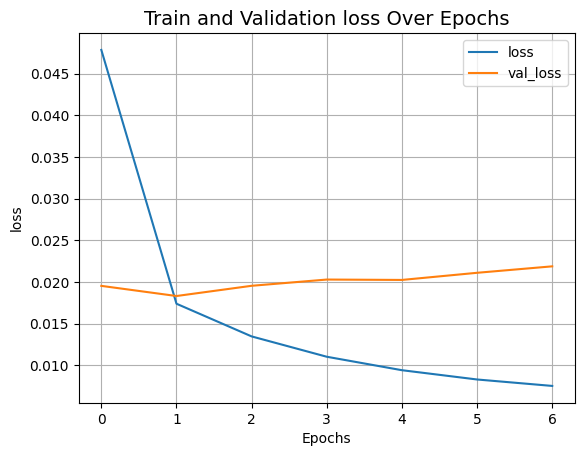

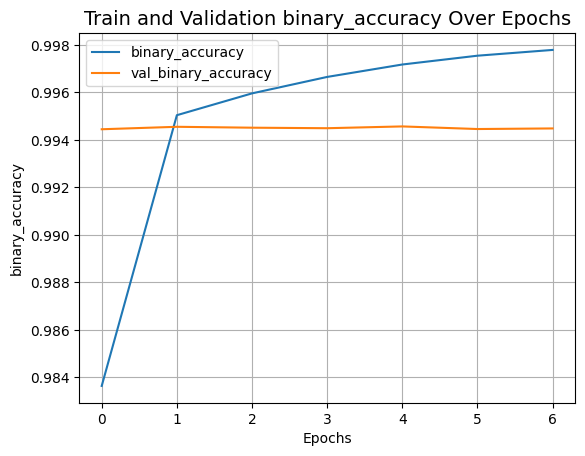

In [25]:
# plotting loss
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

# **Model Evaluation**

In [27]:
# model evaltuation on test and val dataset
_, binary_acc1 = model1.evaluate(test_dataset)
_, binary_acc2 = model1.evaluate(validation_dataset)

print(f"Categorical accuracy on the test set: {round(binary_acc1 * 100, 2)}%.")
print(f"Categorical accuracy on the validation set: {round(binary_acc2 * 100, 2)}%.")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - binary_accuracy: 0.9948 - loss: 0.0167
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - binary_accuracy: 0.9944 - loss: 0.0186
Categorical accuracy on the test set: 99.47%.
Categorical accuracy on the validation set: 99.45%.


# **Save Model and Text Vectorizer:**

In [29]:
import pickle
# Save the model
model1.save("Models/model.h5")

# Save the configuration of the text vectorizer
saved_text_vectorizer_config = text_vectorizer.get_config()
with open("Models/text_vectorizer_config.pkl", "wb") as f:
    pickle.dump(saved_text_vectorizer_config, f)


# Save the vocabulary
with open("Models/vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

# **Load Model and Text Vectorizer:**

# **Model Prediction**

# ** =======Section 2========**

# **Recommendation System**

In [7]:
arxiv_data.drop(columns = ["terms","abstracts"], inplace = True)

In [8]:
arxiv_data

,titles
0,Multi-Level Attention Pooling for Graph Neural...
1,Decision Forests vs. Deep Networks: Conceptual...
2,Power up! Robust Graph Convolutional Network v...
3,Releasing Graph Neural Networks with Different...
4,Recurrence-Aware Long-Term Cognitive Network f...
...,...
56176,Mining Spatio-temporal Data on Industrializati...
56177,Wav2Letter: an End-to-End ConvNet-based Speech...
56178,Deep Reinforcement Learning with Double Q-lear...
56179,Generalized Low Rank Models


# **Sentence Transformers**

In [9]:
from sentence_transformers import SentenceTransformer,util

/home/najnin/.local/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [10]:
model = SentenceTransformer('all-MiniLM-L6-v2')

/home/najnin/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [11]:
sentences = arxiv_data['titles']

In [12]:
embeddings = model.encode(sentences)

In [13]:
embeddings

array([[ 0.06643411, -0.04954598,  0.06388082, ...,  0.00106297,
        -0.12156384, -0.06962778],
       [ 0.0921226 , -0.07606938,  0.06572865, ..., -0.0856517 ,
        -0.09266545,  0.00725295],
       [-0.08162681,  0.02428927,  0.01888743, ...,  0.00806166,
        -0.05129531, -0.05873994],
       ...,
       [-0.09695324,  0.00057095,  0.07726481, ..., -0.01443811,
        -0.04748208,  0.06130565],
       [ 0.00768868, -0.10124182,  0.08909856, ..., -0.08199871,
        -0.05649743,  0.09007054],
       [ 0.06078521, -0.08312801, -0.00907773, ..., -0.03148183,
         0.0571311 ,  0.0569689 ]], dtype=float32)

In [14]:
embeddings.shape

(56181, 384)

# **Print the embeddings**

In [15]:
c=0

for sentence,embedding in zip(sentences,embeddings):
    print("Sentence:", sentence)
    print("Embedding length:", len(embedding)) # list of floats
    print("")
    if c>=5:
        break
    c+=1

Sentence: Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities
Embedding length: 384

Sentence: Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes
Embedding length: 384

Sentence: Power up! Robust Graph Convolutional Network via Graph Powering
Embedding length: 384

Sentence: Releasing Graph Neural Networks with Differential Privacy Guarantees
Embedding length: 384

Sentence: Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
Embedding length: 384

Sentence: Lifelong Graph Learning
Embedding length: 384



# **Save files**

In [16]:
import pickle

with open("Models/embeddings.pkl",'wb') as f:
    pickle.dump(embeddings,f)
    
with open('Models/sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)
    
with open('Models/rec_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# **Recommendation for similar papers**

In [17]:
# load save files
embeddings = pickle.load(open('Models/embeddings.pkl','rb'))
sentences = pickle.load(open('Models/sentences.pkl','rb'))
rec_model = pickle.load(open('Models/rec_model.pkl','rb'))

In [18]:
import torch

def recommendation(input_paper):
    # Calculate cosine similarity scores between the embeddings of input_paper and all papers in the dataset.
    cosine_scores = util.cos_sim(embeddings, rec_model.encode(input_paper))
    
    # Get the indices of the top-k most similar papers based on cosine similarity.
    top_similar_papers = torch.topk(cosine_scores, dim=0, k=5, sorted=True)
                                 
    # Retrieve the titles of the top similar papers.
    papers_list = []
    for i in top_similar_papers.indices:
        papers_list.append(sentences[i.item()])
    
    return papers_list
    

In [19]:
# exampel usage 1: (use this paper as input (BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding))
# exampel usage 2: (use this paper as input (Review of deep learning: concepts, CNN architectures, challenges, applications, future directions))

input_paper = input("Enter the title of any paper you like ")

recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

We recommend to read this paper............
Attention that does not Explain Away
Attention that does not Explain Away
Attention that does not Explain Away
Area Attention
Area Attention
